In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/var/folders/md/zm46y3p12rxfjbmvb0nttrbw0000gn/T/ipykernel_87643/912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import os
from glob import glob
import pandas as pd
import numpy as np

In [3]:
data_dir = './merge/'
save_dir = './eda/'

if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

dirNames = glob(os.path.join(data_dir,'*.csv'))
print(dirNames)

['./merge/회천동.csv', './merge/봉개동.csv', './merge/중문동.csv', './merge/한경면.csv', './merge/오등동.csv', './merge/이도일동.csv', './merge/오라이동.csv', './merge/한림읍.csv', './merge/상예동.csv', './merge/서귀동.csv', './merge/아라이동.csv', './merge/동홍동.csv', './merge/상효동.csv', './merge/애월읍.csv', './merge/화북이동.csv', './merge/오라일동.csv', './merge/도평동.csv', './merge/서홍동.csv', './merge/외도일동.csv', './merge/토평동.csv', './merge/노형동.csv', './merge/영평동.csv', './merge/월평동.csv', './merge/용강동.csv', './merge/이호이동.csv', './merge/호근동.csv', './merge/표선면.csv', './merge/도련일동.csv', './merge/하원동.csv', './merge/대정읍.csv', './merge/성산읍.csv', './merge/안덕면.csv', './merge/용담이동.csv', './merge/도순동.csv', './merge/서호동.csv', './merge/강정동.csv', './merge/삼양일동.csv', './merge/해안동.csv', './merge/하예동.csv', './merge/색달동.csv', './merge/도련이동.csv', './merge/남원읍.csv', './merge/구좌읍.csv', './merge/아라일동.csv', './merge/조천읍.csv']


## 제주 모든 지역의 DSR+기온 데이터를 가져온다.

In [4]:
# ['Unnamed: 0', 'DSR', 'DSR_DQF1', '강수량', '기온', '풍향', '풍속', '습도']
delCol = ['Unnamed: 0']
firstFlag = True
i=0

localName = []
newCol =[]

for dirName in dirNames:
    #지역별 컬럼 순서 리스트를 생성 
    localName.append(dirName.split('/')[2].split('.')[0])

    if firstFlag== True:
        # 파일 읽기
        merge_df = pd.read_csv(dirName, encoding='UTF-8')
        print(merge_df.columns)
        merge_df.drop(columns = delCol, inplace=True)
        merge_df.set_index(keys='일시', inplace=True, drop=True)

        firstFlag = False
    else:
        temp_df = pd.read_csv(dirName, encoding='UTF-8')
        temp_df.drop(columns = delCol, inplace=True)
        temp_df.set_index(keys='일시', inplace=True, drop=True) 
        merge_df = pd.merge(merge_df, temp_df, how='left', left_index=True, right_index=True)
    
    if 'DSR' not in delCol:
        newCol.append('DSR_{}'.format(i))
    if 'DSR_DQF1' not in delCol:
        newCol.append('DSR_DQF1_{}'.format(i))
    if '강수량' not in delCol:
        newCol.append('강수량_{}'.format(i))
    if '풍속' not in delCol:
        newCol.append('풍속_{}'.format(i))
    if '풍향' not in delCol:
        newCol.append('풍향_{}'.format(i))
    if '기온' not in delCol:
        newCol.append('기온_{}'.format(i))    
    if '습도' not in delCol:
        newCol.append('습도_{}'.format(i))   

    merge_df.columns = newCol
    i+=1

print(merge_df.columns)    
print(newCol)
merge_df

Index(['Unnamed: 0', '일시', 'DSR', 'DSR_DQF1', '강수량', '기온', '풍향', '풍속', '습도'], dtype='object')
Index(['DSR_0', 'DSR_DQF1_0', '강수량_0', '풍속_0', '풍향_0', '기온_0', '습도_0', 'DSR_1',
       'DSR_DQF1_1', '강수량_1',
       ...
       '풍향_43', '기온_43', '습도_43', 'DSR_44', 'DSR_DQF1_44', '강수량_44', '풍속_44',
       '풍향_44', '기온_44', '습도_44'],
      dtype='object', length=315)
['DSR_0', 'DSR_DQF1_0', '강수량_0', '풍속_0', '풍향_0', '기온_0', '습도_0', 'DSR_1', 'DSR_DQF1_1', '강수량_1', '풍속_1', '풍향_1', '기온_1', '습도_1', 'DSR_2', 'DSR_DQF1_2', '강수량_2', '풍속_2', '풍향_2', '기온_2', '습도_2', 'DSR_3', 'DSR_DQF1_3', '강수량_3', '풍속_3', '풍향_3', '기온_3', '습도_3', 'DSR_4', 'DSR_DQF1_4', '강수량_4', '풍속_4', '풍향_4', '기온_4', '습도_4', 'DSR_5', 'DSR_DQF1_5', '강수량_5', '풍속_5', '풍향_5', '기온_5', '습도_5', 'DSR_6', 'DSR_DQF1_6', '강수량_6', '풍속_6', '풍향_6', '기온_6', '습도_6', 'DSR_7', 'DSR_DQF1_7', '강수량_7', '풍속_7', '풍향_7', '기온_7', '습도_7', 'DSR_8', 'DSR_DQF1_8', '강수량_8', '풍속_8', '풍향_8', '기온_8', '습도_8', 'DSR_9', 'DSR_DQF1_9', '강수량_9', '풍속_9', '풍향_9', '기온_9', '습도_9

,DSR_0,DSR_DQF1_0,강수량_0,풍속_0,풍향_0,기온_0,습도_0,DSR_1,DSR_DQF1_1,강수량_1,...,풍향_43,기온_43,습도_43,DSR_44,DSR_DQF1_44,강수량_44,풍속_44,풍향_44,기온_44,습도_44
일시,,,,,,,,,,,,,,,,,,,,,
2020-03-01 09:00:00,110.200005,1.0,0.0,11.065000,108.050000,1.938333,0.0,122.800003,1.0,0.0,...,80.163333,3.035000,83.216667,0.000000,1.0,0.0,11.065000,108.050000,1.938333,0.0
2020-03-01 10:00:00,161.699997,1.0,0.0,11.120000,92.526667,1.911667,0.0,216.100006,1.0,0.0,...,87.995000,3.198333,80.776667,128.900009,1.0,0.0,11.120000,92.526667,1.911667,0.0
2020-03-01 11:00:00,119.700005,1.0,0.5,11.005000,69.111667,2.330000,0.0,130.900009,1.0,0.5,...,70.756667,1.995000,87.556667,112.800003,1.0,0.5,11.005000,69.111667,2.330000,0.0
2020-03-01 12:00:00,128.199997,1.0,0.0,10.866667,76.396667,2.296667,0.0,145.600006,1.0,0.0,...,64.386667,2.116667,93.023333,148.800003,1.0,0.0,10.866667,76.396667,2.296667,0.0
2020-03-01 13:00:00,227.199997,1.0,0.5,11.131667,71.310000,2.675000,0.0,217.500000,1.0,0.5,...,59.836667,2.065000,94.351667,229.600006,1.0,0.5,11.131667,71.310000,2.675000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 20:00:00,0.000000,0.0,0.0,2.255000,325.961667,7.356667,0.0,0.000000,0.0,0.0,...,273.090000,4.873333,57.988333,0.000000,0.0,0.0,2.255000,325.961667,7.356667,0.0
2020-12-31 21:00:00,0.000000,0.0,0.0,2.425000,318.391667,6.331667,0.0,0.000000,0.0,0.0,...,276.696667,4.556667,63.541667,0.000000,0.0,0.0,2.425000,318.391667,6.331667,0.0
2020-12-31 22:00:00,0.000000,0.0,0.0,2.605000,327.181667,7.045000,0.0,0.000000,0.0,0.0,...,284.361667,4.573333,60.421667,0.000000,0.0,0.0,2.605000,327.181667,7.045000,0.0


In [5]:
solarGenFile = "./solarGen.csv"
solar_df = pd.read_csv(solarGenFile, encoding='UTF-8')
solar_df.set_index(keys='일시', inplace=True, drop=True)
solar_df

,제주태양광 총발전량
일시,
2020-03-01 09:00:00,11.325051
2020-03-01 10:00:00,17.675403
2020-03-01 11:00:00,22.734366
2020-03-01 12:00:00,27.707441
2020-03-01 13:00:00,26.947472
...,...
2020-12-31 19:00:00,0.436184
2020-12-31 20:00:00,0.025248
2020-12-31 21:00:00,0.000224


In [6]:
merge_df = pd.merge(merge_df, solar_df, how='left', left_index=True, right_index=True)
merge_df = merge_df.fillna(0)
print(localName)
merge_df.head(20)

['회천동', '봉개동', '중문동', '한경면', '오등동', '이도일동', '오라이동', '한림읍', '상예동', '서귀동', '아라이동', '동홍동', '상효동', '애월읍', '화북이동', '오라일동', '도평동', '서홍동', '외도일동', '토평동', '노형동', '영평동', '월평동', '용강동', '이호이동', '호근동', '표선면', '도련일동', '하원동', '대정읍', '성산읍', '안덕면', '용담이동', '도순동', '서호동', '강정동', '삼양일동', '해안동', '하예동', '색달동', '도련이동', '남원읍', '구좌읍', '아라일동', '조천읍']


,DSR_0,DSR_DQF1_0,강수량_0,풍속_0,풍향_0,기온_0,습도_0,DSR_1,DSR_DQF1_1,강수량_1,...,기온_43,습도_43,DSR_44,DSR_DQF1_44,강수량_44,풍속_44,풍향_44,기온_44,습도_44,제주태양광 총발전량
일시,,,,,,,,,,,,,,,,,,,,,
2020-03-01 09:00:00,110.200005,1.0,0.0,11.065000,108.050000,1.938333,0.0,122.800003,1.0,0.0,...,3.035000,83.216667,0.000000,1.0,0.0,11.065000,108.050000,1.938333,0.0,11.325051
2020-03-01 10:00:00,161.699997,1.0,0.0,11.120000,92.526667,1.911667,0.0,216.100006,1.0,0.0,...,3.198333,80.776667,128.900009,1.0,0.0,11.120000,92.526667,1.911667,0.0,17.675403
2020-03-01 11:00:00,119.700005,1.0,0.5,11.005000,69.111667,2.330000,0.0,130.900009,1.0,0.5,...,1.995000,87.556667,112.800003,1.0,0.5,11.005000,69.111667,2.330000,0.0,22.734366
2020-03-01 12:00:00,128.199997,1.0,0.0,10.866667,76.396667,2.296667,0.0,145.600006,1.0,0.0,...,2.116667,93.023333,148.800003,1.0,0.0,10.866667,76.396667,2.296667,0.0,27.707441
2020-03-01 13:00:00,227.199997,1.0,0.5,11.131667,71.310000,2.675000,0.0,217.500000,1.0,0.5,...,2.065000,94.351667,229.600006,1.0,0.5,11.131667,71.310000,2.675000,0.0,26.947472
2020-03-01 14:00:00,164.400009,1.0,0.0,11.240000,94.641667,2.610000,0.0,182.400009,1.0,0.0,...,2.083333,94.301667,139.100006,1.0,0.0,11.240000,94.641667,2.610000,0.0,20.309746
2020-03-01 15:00:00,155.100006,1.0,0.0,11.045000,69.816667,1.338333,0.0,161.699997,1.0,0.0,...,2.203333,91.171667,177.100006,1.0,0.0,11.045000,69.816667,1.338333,0.0,13.045877
2020-03-01 16:00:00,135.699997,1.0,1.0,10.941667,45.951667,2.305000,0.0,175.600006,1.0,1.0,...,1.300000,95.985000,127.400002,1.0,1.0,10.941667,45.951667,2.305000,0.0,9.187901
2020-03-01 17:00:00,165.400009,1.0,0.0,10.715000,46.701667,2.846667,0.0,160.900009,1.0,0.0,...,1.493333,97.156667,167.100006,1.0,0.0,10.715000,46.701667,2.846667,0.0,4.811644


In [7]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7186 entries, 2020-03-01 09:00:00 to 2021-01-01 00:00:00
Columns: 316 entries, DSR_0 to 제주태양광 총발전량
dtypes: float64(316)
memory usage: 17.6+ MB


In [8]:
merge_df.to_csv(save_dir + "dsr_solar.csv", mode='w', encoding='utf-8-sig')

In [33]:
import platform

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

if platform.system()=='Windows':
    plt.rc('font', family='NanumMyeongjo') # For Windows
    print(plt.rcParams['font.family'])
elif platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic') # For MacOS
    print(plt.rcParams['font.family'])
else:
    plt.rc('font', family='NanumGothic')
    print(plt.rcParams['font.family'])

# 폰트 사이즈
plt.rcParams['font.size'] = 12.

# x축 라벨사이즈
plt.rcParams['xtick.labelsize'] = 12.

# y축 라벨사이즈
plt.rcParams['ytick.labelsize'] = 12.

#그래프 축 폰트사이즈
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.unicode_minus'] = False

['AppleGothic']


In [34]:
colNum = len(merge_df.columns)
colNum

316

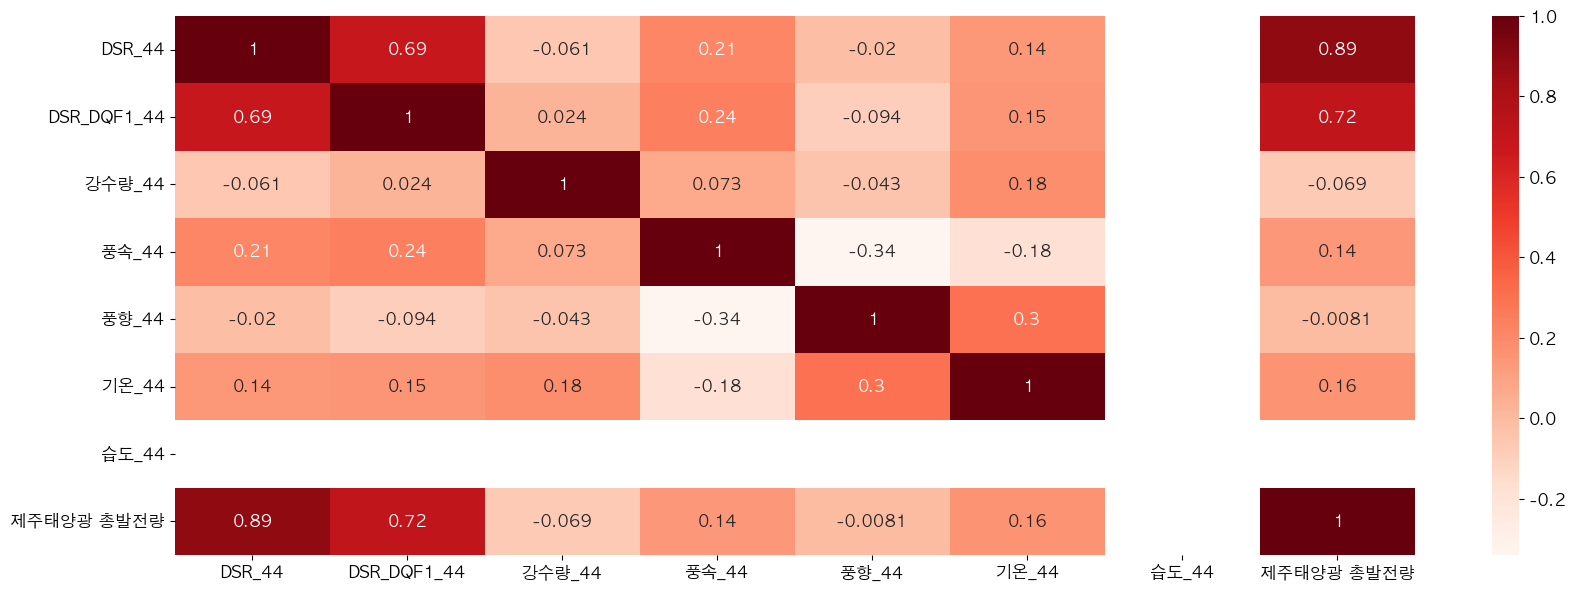

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(20,7))
cor = merge_df.iloc[:,colNum-8:].corr()
heatmap = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

fig = heatmap.get_figure()
fig.savefig("solar_dsr_corr.png") 

### 제주태양광 총발전량과 DSR간의 상관관계가 높지만, csv파일을 직접 열어서 살펴보면 두 데이터간의 시간이 약간씩 어긋나 있는 것을 발견할 수 있다.
### 2020년 8월 26일 이전의 경우 한 시간씩 데이터를 당겨줘야 한다.

In [12]:
merge_df.columns

Index(['DSR_0', 'DSR_DQF1_0', '강수량_0', '풍속_0', '풍향_0', '기온_0', '습도_0', 'DSR_1',
       'DSR_DQF1_1', '강수량_1',
       ...
       '기온_43', '습도_43', 'DSR_44', 'DSR_DQF1_44', '강수량_44', '풍속_44', '풍향_44',
       '기온_44', '습도_44', '제주태양광 총발전량'],
      dtype='object', length=316)

In [40]:
merge_df[merge_df['습도_0']>150]=0
merge_df[merge_df['풍속_0']>100]=0
merge_df[merge_df['강수량_0']>30]=0

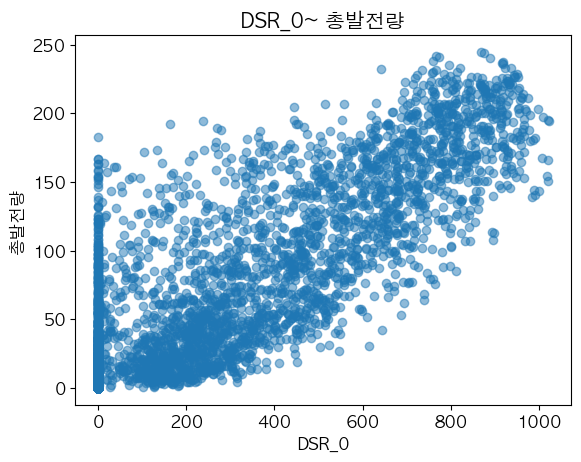

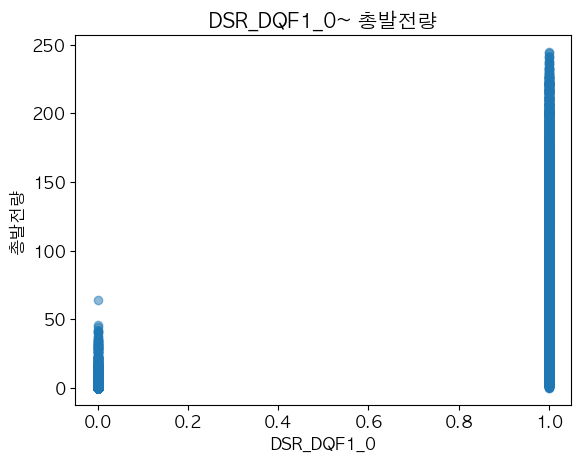

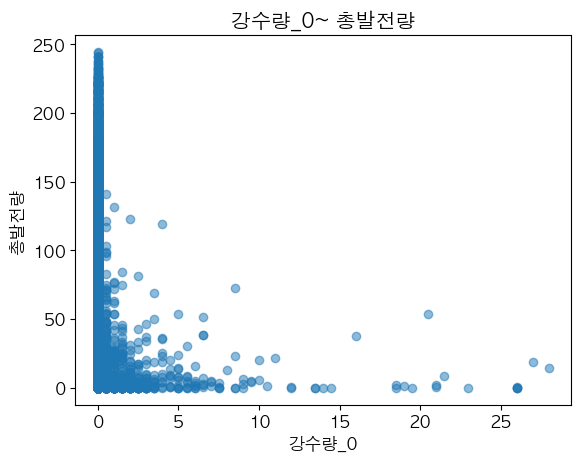

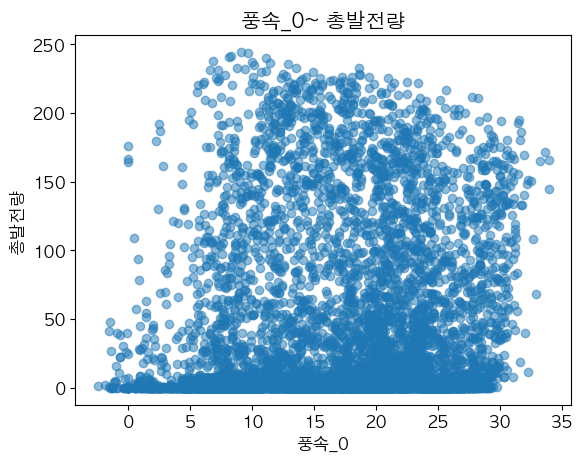

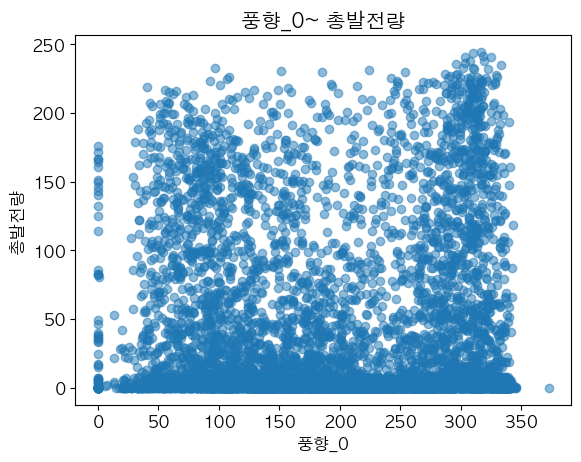

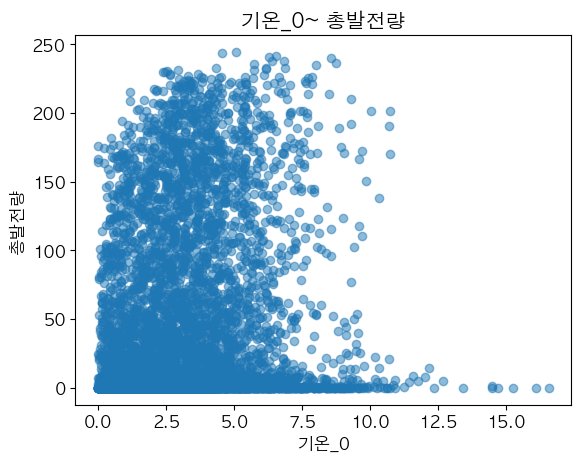

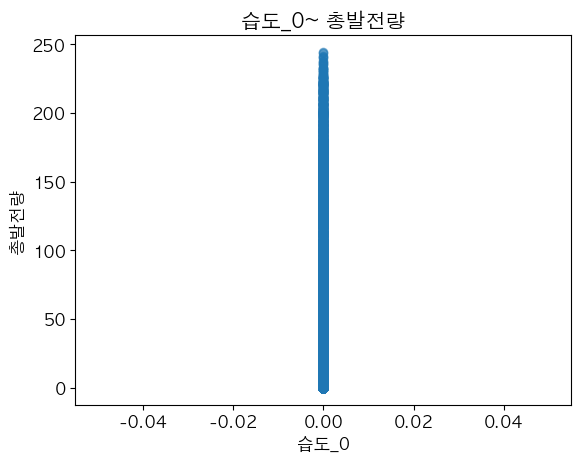

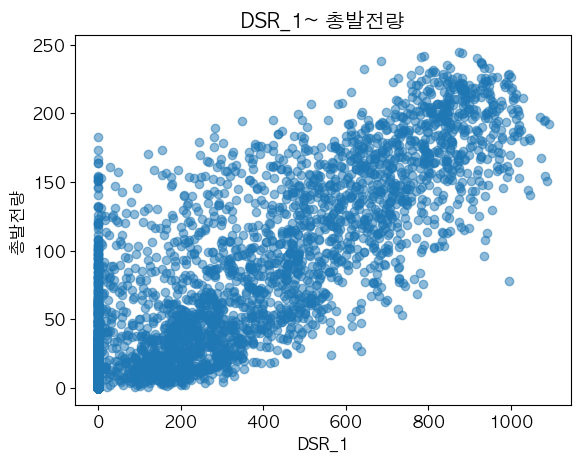

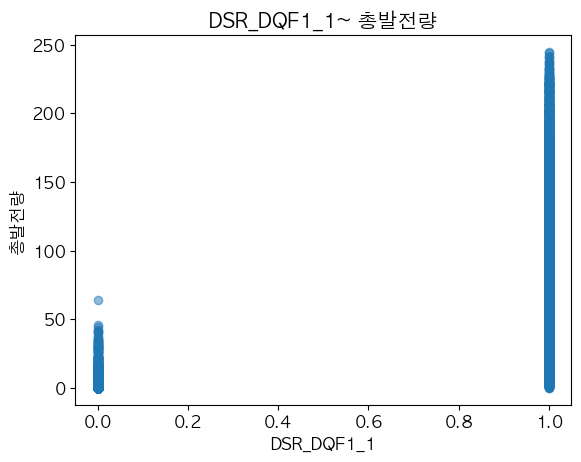

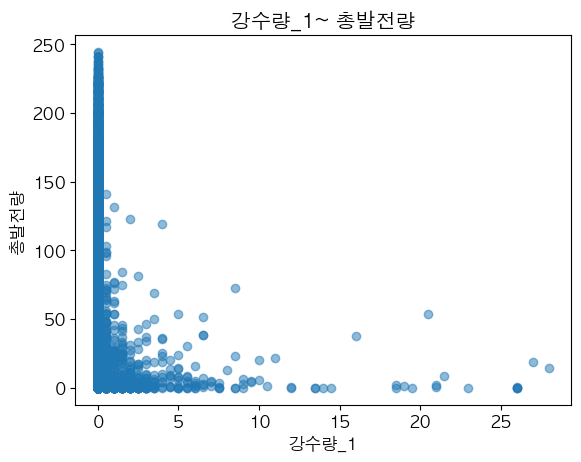

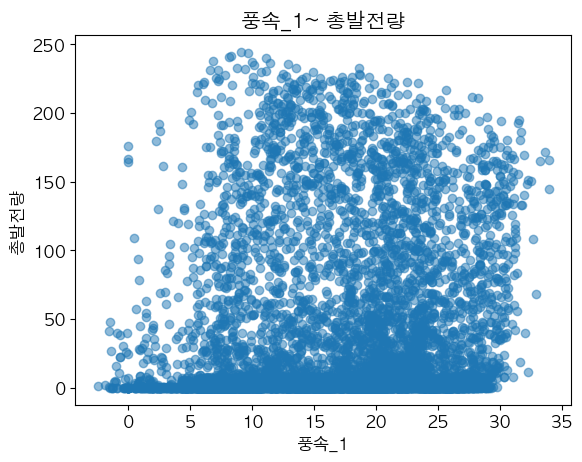

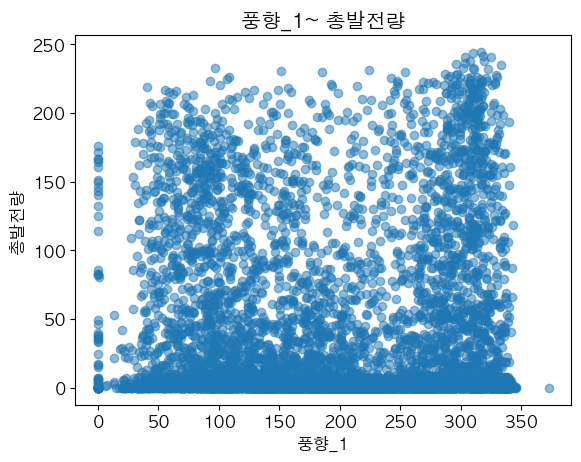

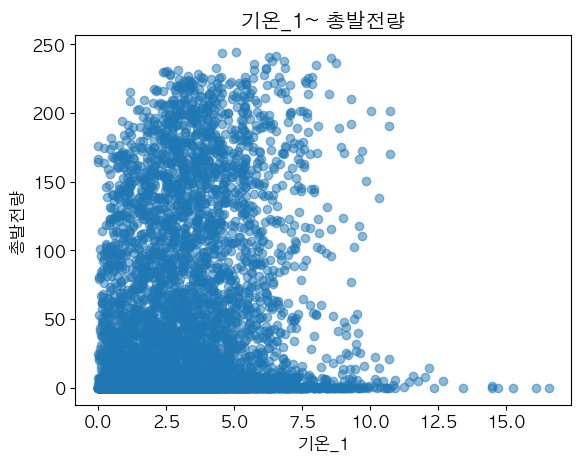

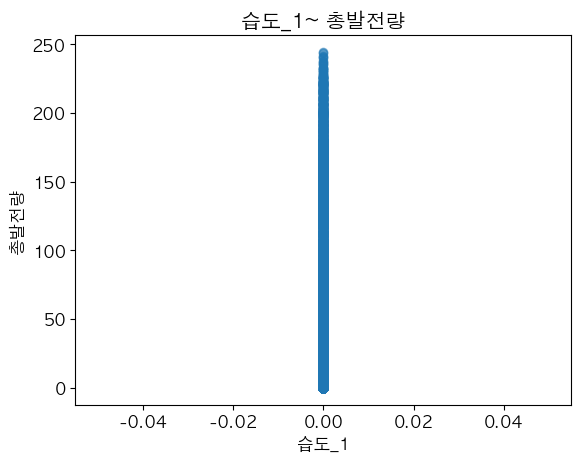

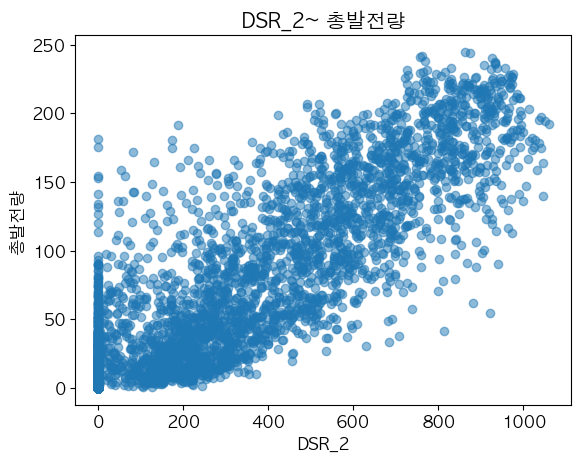

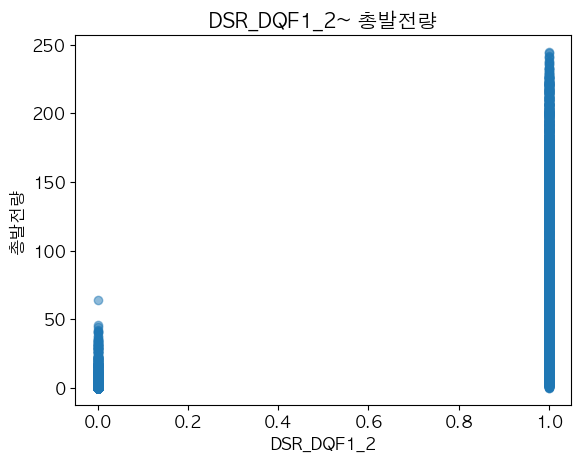

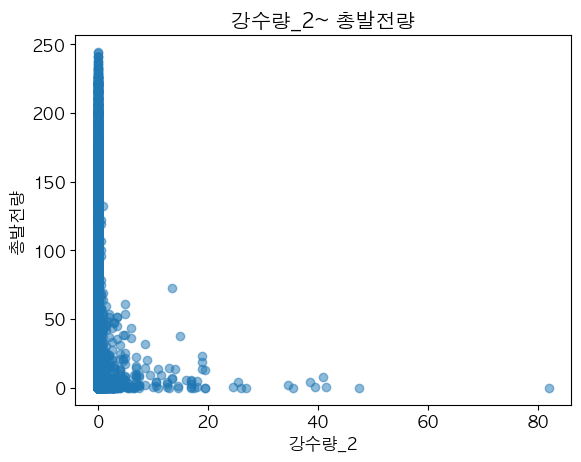

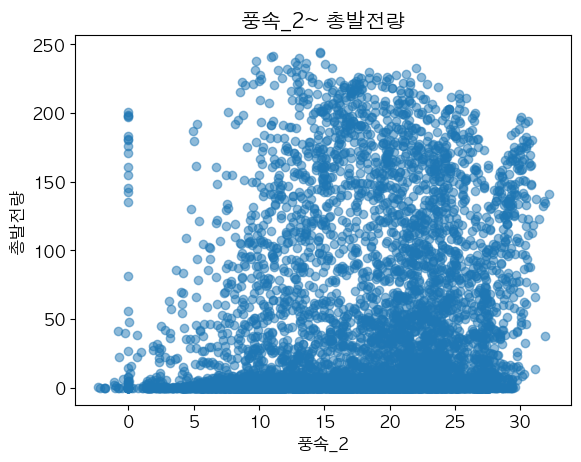

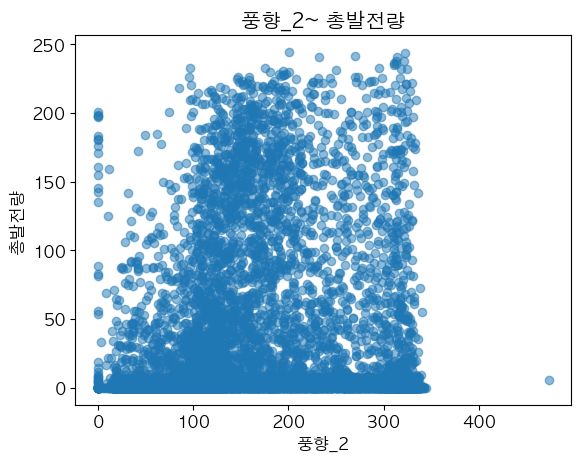

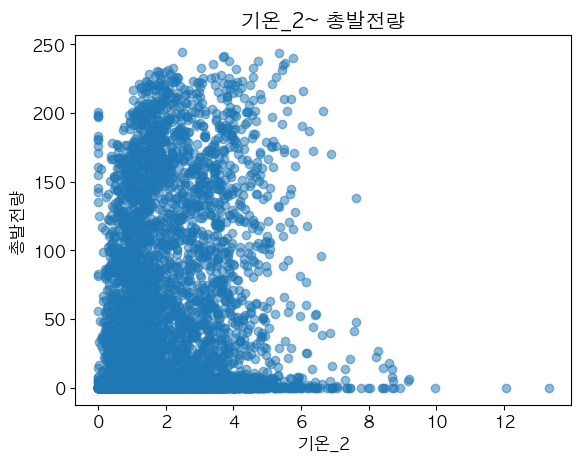

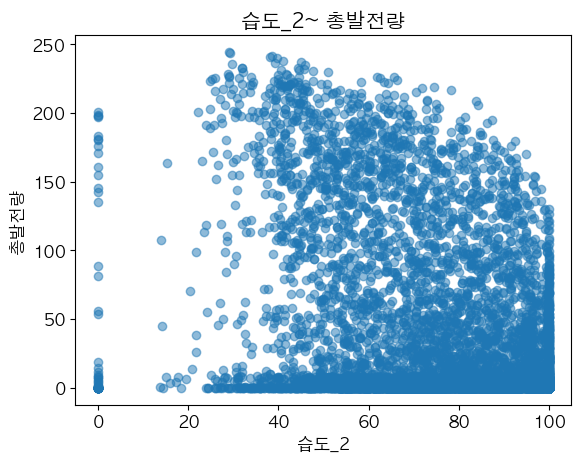

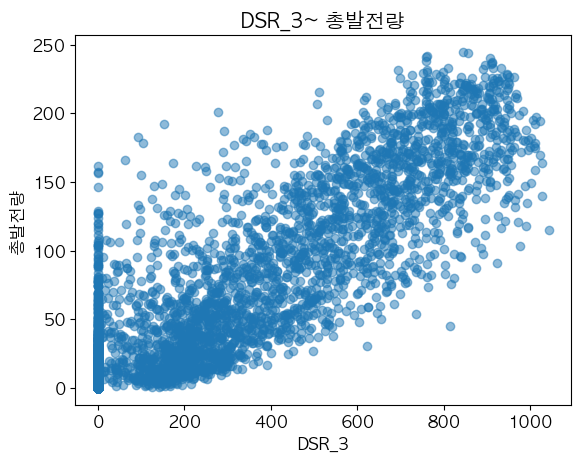

In [41]:
import matplotlib.pyplot as plt

i=0
for colName in merge_df.columns:
    
    X = merge_df[colName]
    Y = merge_df['제주태양광 총발전량']

    plt.scatter(X, Y, alpha=0.5)
    plt.title(colName +'~ 총발전량')
    plt.xlabel(colName)
    plt.ylabel('총발전량')
    plt.show()
    
    if i>20:
        break
    else:
        i+=1

In [15]:
# merge_df데이터프레임에서 총발전량만을 제외한 컬럼으로 'X'라는 이름으로 데이터프레임 생성
X = merge_df.drop(columns = ['제주태양광 총발전량'])
y = merge_df['제주태양광 총발전량']

In [16]:
X.shape, y.shape

((7186, 315), (7186,))

In [17]:
TRAIN_SPLIT = 6500

In [18]:
X.columns

Index(['DSR_0', 'DSR_DQF1_0', '강수량_0', '풍속_0', '풍향_0', '기온_0', '습도_0', 'DSR_1',
       'DSR_DQF1_1', '강수량_1',
       ...
       '풍향_43', '기온_43', '습도_43', 'DSR_44', 'DSR_DQF1_44', '강수량_44', '풍속_44',
       '풍향_44', '기온_44', '습도_44'],
      dtype='object', length=315)

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range = (0,1))
#scaler = StandardScaler()

def normalize(X,y):
    X_norm = X.copy()
    
    for name in X:
        temp = X[name].to_numpy().reshape(-1,1)
        #print(temp)
        X_norm[name] = scaler.fit_transform(temp)
        

    temp = y.to_numpy().reshape(-1,1)
    y_norm = scaler.fit_transform(temp)
        
    return X_norm, y_norm

X_norm, ydata = normalize(X,y)
Xdata = X_norm.to_numpy()

In [21]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)

In [22]:
sequence_length = 24
# 다음 한시간을 예측
future_target = 1
STEP = 1

X_train, y_train = multivariate_data(Xdata, ydata, 0, TRAIN_SPLIT, sequence_length,
                                                   future_target, STEP, single_step=True)
X_test, y_test = multivariate_data(Xdata, ydata, TRAIN_SPLIT, None, sequence_length,
                                               future_target, STEP, single_step=True)
X_train.shape, X_test.shape

((6476, 24, 315), (661, 24, 315))

In [23]:
y_train.shape, y_test.shape

((6476, 1), (661, 1))

## keras를 활용한 딥러닝 모델

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import models, Input
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Bidirectional
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models

Init Plugin
Init Graph Optimizer
Init Kernel


In [25]:
import tensorflow as tf

BATCH_SIZE = 28
BUFFER_SIZE = 1000

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).cache().batch(BATCH_SIZE)
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

Metal device set to: Apple M1 Pro


2022-11-07 10:00:26.776723: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-07 10:00:26.776825: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
MODEL = 'LSTM'

In [27]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, SimpleRNN, Bidirectional, Dropout

h_units = 100

inputs = Input(shape=(X_train.shape[-2:]))
x = LSTM(h_units, return_sequences=False, recurrent_dropout=0.5, kernel_initializer='he_normal')(inputs)
#x = LSTM(h_units, return_sequences=False, kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)

outputs = Dense(1)(x)

model = Model(inputs, outputs)

model.compile(loss='mse', metrics=['mae'], optimizer=Adam(learning_rate = 0.0006))

In [28]:
from tensorflow.keras.layers import Dense, SimpleRNN, Bidirectional

# timesteps,  input_dim
print(X_train.shape[-2:])

h_units = 100

model = models.Sequential()
model.add(SimpleRNN(h_units, return_sequences=True, recurrent_dropout=0.5, kernel_initializer='he_normal', input_shape=X_train.shape[-2:],))
model.add(SimpleRNN(h_units))      
model.add(Dense(1))

model.compile(loss='mse', metrics=['mae'], optimizer=Adam(learning_rate = 0.0006))

(24, 315)


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 24, 100)           41600     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 61,801
Trainable params: 61,801
Non-trainable params: 0
_________________________________________________________________


In [30]:
!pip install graphviz

In [31]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [32]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint


# 'val_mae'를 기준으로 7epoch동안 val_mae 값이 줄어들지 않을 경우 기존의 learning_rate를 반으로 줄인다.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5,patience=7)

#'val_mae'가 20EPOCH동안 내려가지 않으면 학습을 중단한다.
es=EarlyStopping(monitor='val_mae', patience=20)

# 학습중에 'val_mae'가 가장 낮을 때 'best.h5'에 weight값을 저장한다.
mc = ModelCheckpoint('best.h5', monitor='val_mae', mode='auto', verbose = 1, save_best_only=True)
callback = [reduce_lr, es, mc]
    
history = model.fit(train_data, epochs=150, batch_size=BATCH_SIZE, validation_data=test_data, callbacks=[callback])

Epoch 1/150


2022-11-07 10:00:28.151857: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-07 10:00:28.160608: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-07 10:00:28.161276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 89/232 [==========>...................] - ETA: 1:06 - loss: 0.1471 - mae: 0.2738

KeyboardInterrupt: 

In [42]:
import matplotlib.pyplot as pyplot

if MODEL=='LSTM':
    model.load_weights('best.h5')
   
    pyplot.title('Loss / Mean Squared Error')
    pyplot.plot(history.history['mae'], label='mae')
    pyplot.plot(history.history['val_mae'], label='val_mae')
    #pyplot.plot(history.history['val_mae'], label='val_mae')
    pyplot.legend()
    pyplot.show() 
    
    test_loss = model.evaluate(X_test, y_test)
    
    y_pred = model.predict(X_test)

ValueError: Cannot assign to variable simple_rnn/simple_rnn_cell/kernel:0 due to variable shape (315, 100) and value shape (270, 100) are incompatible

In [ ]:
y_pred = model.predict(X_test)

y_pred

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae_v  = mean_absolute_error(y_test, y_pred)
mse_v = mean_squared_error(y_test, y_pred)
mae_v, mse_v

simpleRNN : 100 -> (0.12400743489736131, 0.024809463253515747)

## MAE로 콜백함수 설정
#### LSTM : 128 -> (0.05186472230584919, 0.009739468487245427)
#### LSTM : 128 -> (0.05299152431424407, 0.009697657620142913) + '풍속'
#### LSTM : 128 -> (0.049887592129661824, 0.007982337127225379) + '풍속'+'DQF1'
#### LSTM : 128 -> (0.04544302499453864, 0.007042812128247087) + '풍속'+'DQF1'+'습도'
#### LSTM : 128 -> (0.0460821004765238, 0.0069705163494385965) + '풍속'+'DQF1'+'습도'+'기온'
#### LSTM : 100 -> (0.041063027372183813, 0.0057732332516799946) + '풍속'+'DQF1'+'습도'+'기온'
#### LSTM : 100 -> (0.045244726636263416, 0.006748445631571505)+ '풍속'+'DQF1'+'습도'+'기온'
#### LSTM : 100 ->(0.0421313471569797, 0.006338486476131329) + '풍속'+'DQF1'+'습도'+'기온' + '강수량'
#### LSTM :100 -> (0.04613880692302537, 0.006745701893742057) + '풍속'+'DQF1'+'습도'+'기온' + '강수량' + '풍향'
#### GRU :128 ->    (0.051015486021901944, 0.007811862726629979) + '풍속'+'DQF1'+'습도'+'기온'



## MSE로 콜백함수 설정
#### LSTM :128 -> (0.05538212883400616, 0.009421789066403202)
#### GRU : 128 -> (0.05489935197760299, 0.009717866652740397)
#### GRU : 192 -> (0.05225450641321943, 0.009797037662854774)

In [ ]:
y_test_denorm, y_pred_denorm = denormalize(y_test, y_pred)

In [ ]:
y_test_denorm = y_test_denorm.flatten()
y_test_denorm.shape

In [ ]:
result_df = pd.DataFrame({'총발전량':y_test_denorm})
result_df['발전예측량'] = y_pred_denorm
result_df

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
result_df.plot()
plt.title('predict vs test')
plt.legend()
plt.show()

In [ ]:
result_df.plot(subplots=True)
plt.show()

In [ ]:
saveFile='./result1.csv'
result_df.to_csv(saveFile, mode='w', encoding='utf-8-sig')